# CLUSTERING

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Data Preprocessing

In [5]:
# 1. Handle missing values (not required for Iris dataset)
# 2. Remove outliers (not required for Iris dataset)
# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Exploratory Data Analysis (EDA)
# Perform PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

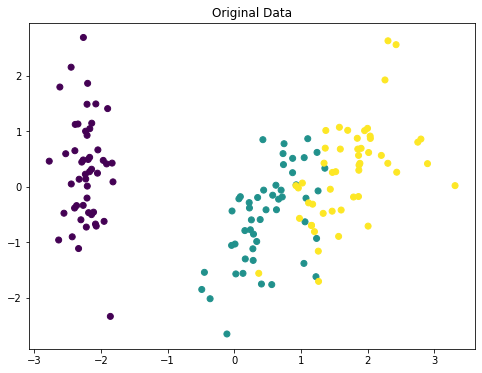

In [8]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Original Data")
plt.show()

# Implementing Clustering Algorithms
1. K-Means Clustering : K-Means is used to identify clusters in the wine dataset and group similar data points together. It helps to visualize and understand the underlying structure of the data. 
  
2. Hierarchical Clustering : Hierarchical Clustering is used to create a hierarchy of clusters and visualize the relationships between them. It helps to identify clusters at different levels of granularity and understand the structure of the data.

3. DBSCAN Clustering : DBSCAN is used to identify clusters of varying densities and handle noise in the data. It helps to identify clusters that are not easily captured by other clustering algorithms and provides a more robust clustering solution.

In [9]:
# Implementing Clustering Algorithms
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [10]:
# Elbow Curve for different K values
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

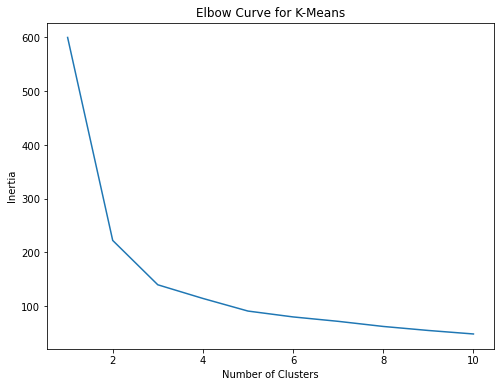

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values)
plt.title("Elbow Curve for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [12]:
# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=3, linkage="ward")
hclust_labels = hclust.fit_predict(X_scaled)

In [13]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Cluster Analysis and Interpretation

In [14]:
print("K-Means Clustering:")
print("Cluster labels:", kmeans_labels)
print("Cluster centers:", kmeans.cluster_centers_)

K-Means Clustering:
Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
Cluster centers: [[ 0.85625295 -0.0168811   0.58869365  0.43690916]
 [-0.96991995  0.93131035 -1.29692182 -1.22142131]
 [-0.49005672 -1.33411815  0.04281753 -0.05031275]
 [-0.54727488  1.99734061 -1.26917974 -1.21672016]
 [ 1.92656914 -0.31102141  1.42586158  1.03930922]
 [ 0.36692117 -1.22984098  0.73652561  0.64891292]
 [-1.3996077  -0.05073356 -1.34022653 -1.32318736]
 [ 0.85306432  0.13456414  0.99010798  1.38647949]
 [ 0.0521389  -0.3098588   0.42431723  0.38380754]
 [ 2.12851559  1.55613014  1.50164482  1.36107679]]


In [15]:
print("\nHierarchical Clustering:")
print("Cluster labels:", hclust_labels)


Hierarchical Clustering:
Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [16]:
print("\nDBSCAN Clustering:")
print("Cluster labels:", dbscan_labels)


DBSCAN Clustering:
Cluster labels: [ 0  0  0  0  0 -1  0  0 -1  0 -1  0  0 -1 -1 -1 -1  0 -1  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2 -1  2
  2  2 -1 -1 -1 -1]


# Visualization

In [17]:
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

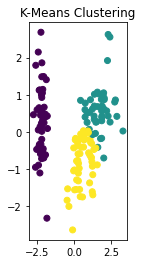

In [18]:
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering")

Text(0.5, 1.0, 'Hierarchical Clustering')

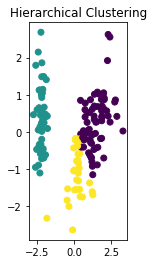

In [19]:
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hclust_labels)
plt.title("Hierarchical Clustering")

Text(0.5, 1.0, 'DBSCAN Clustering')

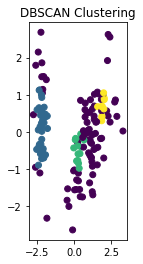

In [20]:
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")

In [21]:
plt.show()

# Evaluation and Performance Metrics

In [22]:
print("\nSilhouette Score for K-Means:", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score for DBSCAN:", silhouette_score(X_scaled, dbscan_labels))


Silhouette Score for K-Means: 0.45994823920518635
Silhouette Score for DBSCAN: 0.009426257445526194
